In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [35]:
data =  pd.read_csv(r"C:\Users\hp\Downloads\Malignant-Comments-Classifier-Project--1-\train.csv")
data

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [37]:
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [38]:
data.tail()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [48]:
labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

In [49]:

train, test = train_test_split(data, test_size=0.33, random_state=42, shuffle=True)

In [51]:
train.shape, test.shape

((106912, 8), (52659, 8))

In [52]:
print(data.dtypes)

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object


In [53]:

X_train = train['comment_text']
X_test = test['comment_text']

In [54]:

data = data.reindex(np.random.permutation(data.index))

In [55]:
comment = data['comment_text']
print(comment.head())

126206    Thank you for the apology , obviously I was of...
16421     }}\n{{WAP assignment|project=WikiProject Unite...
1347      BTW the article looks good for now as most of ...
155986    If this turns out to be a hoax,\n#redirect Pas...
63600     "\nCertainly looks like the same user; thanks ...
Name: comment_text, dtype: object


In [56]:
label = data[['malignant', 'highly_malignant' , 'rude' , 'threat' , 'abuse','loathe']]
print(label.head())

        malignant  highly_malignant  rude  threat  abuse  loathe
126206          0                 0     0       0      0       0
16421           0                 0     0       0      0       0
1347            0                 0     0       0      0       0
155986          0                 0     0       0      0       0
63600           0                 0     0       0      0       0


average length of comment: 394.139


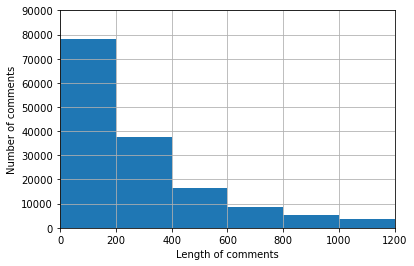

In [57]:
x = [len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

In [59]:

accuracies = [[],[],[]]

In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
cvec = CountVectorizer()
tvec = TfidfTransformer()
model1 = MultinomialNB()

In [61]:
X_train = tvec.fit_transform(cvec.fit_transform(X_train))
X_test = tvec.transform(cvec.transform(X_test))

In [62]:
X_train.shape, X_test.shape

((106912, 149342), (52659, 149342))

In [63]:
for category in labels:
    model1.fit(X_train, train[category])
    accuracy = model1.score(X_test, test[category])
    accuracies[0].append(accuracy)
    print("Accuracy For {0} Class Is {1}%".format(category,round(accuracy*100,2)))

Accuracy For malignant Class Is 91.67%
Accuracy For highly_malignant Class Is 99.0%
Accuracy For rude Class Is 95.02%
Accuracy For threat Class Is 99.71%
Accuracy For abuse Class Is 95.13%
Accuracy For loathe Class Is 99.1%


In [64]:
from sklearn.svm import LinearSVC
model2 = LinearSVC()
for category in labels:
    model2.fit(X_train, train[category])
    accuracy = model2.score(X_test, test[category])
    accuracies[1].append(accuracy)
    print("Accuracy For {0} Class Is {1}%".format(category,round(accuracy*100,2)))

Accuracy For malignant Class Is 96.15%
Accuracy For highly_malignant Class Is 99.07%
Accuracy For rude Class Is 97.9%
Accuracy For threat Class Is 99.75%
Accuracy For abuse Class Is 97.19%
Accuracy For loathe Class Is 99.21%


In [65]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression(n_jobs=1, solver='liblinear')
for category in labels:
    model3.fit(X_train, train[category])
    accuracy = model3.score(X_test, test[category])
    accuracies[2].append(accuracy)
    print("Accuracy For {0} Class Is {1}%".format(category,round(accuracy*100,2)))

Accuracy For malignant Class Is 95.62%
Accuracy For highly_malignant Class Is 99.1%
Accuracy For rude Class Is 97.57%
Accuracy For threat Class Is 99.73%
Accuracy For abuse Class Is 96.98%
Accuracy For loathe Class Is 99.17%


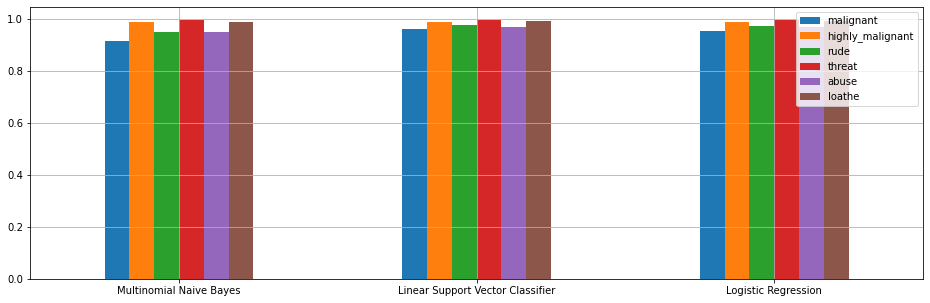

In [66]:
accuracies = pd.DataFrame(accuracies)
fig = accuracies.plot.bar(figsize=(16, 5), grid=True)
plt.xticks(np.arange(3),('Multinomial Naive Bayes','Linear Support Vector Classifier','Logistic Regression'),rotation=0)
plt.legend(labels)
plt.show()

In [67]:
for i in range(3):
    print("Model -",i+1,"... Aggregate Accuracy -",np.mean(accuracies.iloc[i,:]))

Model - 1 ... Aggregate Accuracy - 0.9660773403723327
Model - 2 ... Aggregate Accuracy - 0.9821049899668939
Model - 3 ... Aggregate Accuracy - 0.9802945998468132
